In [1]:
import pbjam as pb
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=5).download().PDCSAP_FLUX

/home/oliver/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


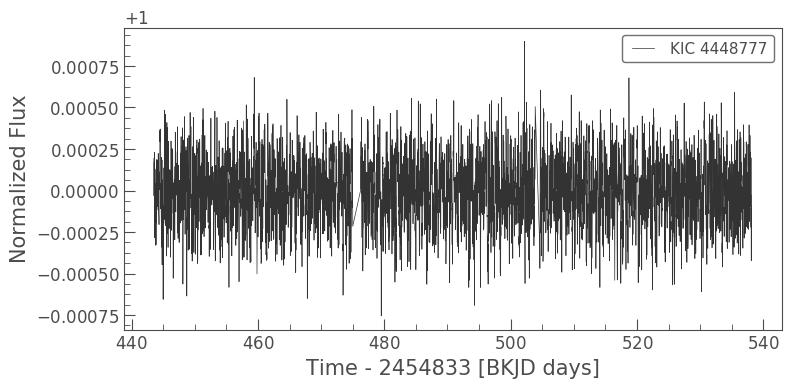

In [4]:
lc = lc.remove_nans().normalize().flatten().remove_outliers()
lc.plot()

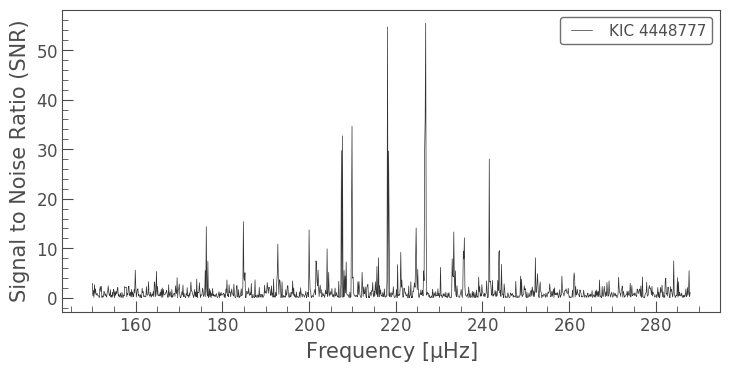

In [5]:
p = lc.to_periodogram(normalization='psd', 
                      maximum_frequency=288, minimum_frequency=150).flatten()
p.plot()

Epsilon from Vrard : (1.3781589243447712, 0.1)


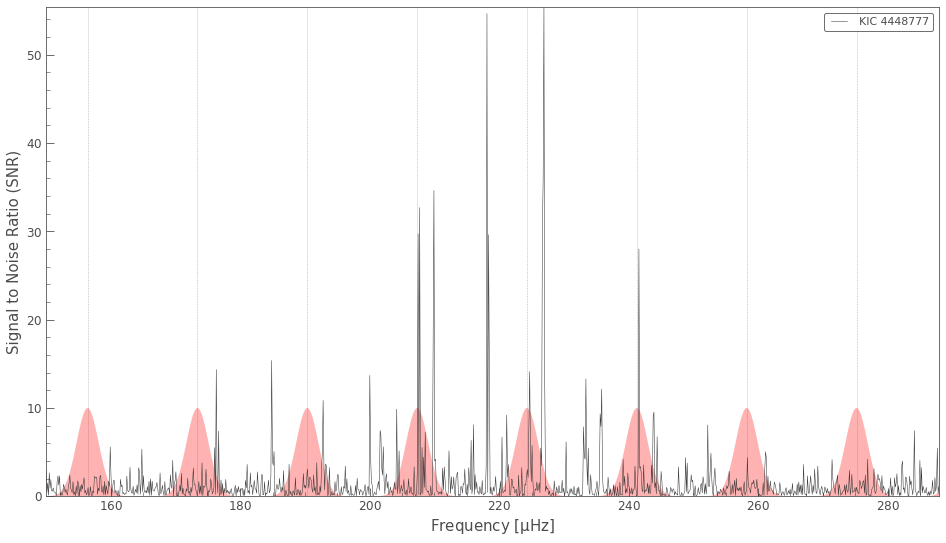

In [6]:
ge_vrard = pb.epsilon()
ep_vrard = ge_vrard(dnu, numax, teff)
print(f'Epsilon from Vrard : {ep_vrard}')
ge_vrard.plot(dnu, numax, teff, p)

Epsilon from kde : [1.3252896563105616, 0.10056732088716207]


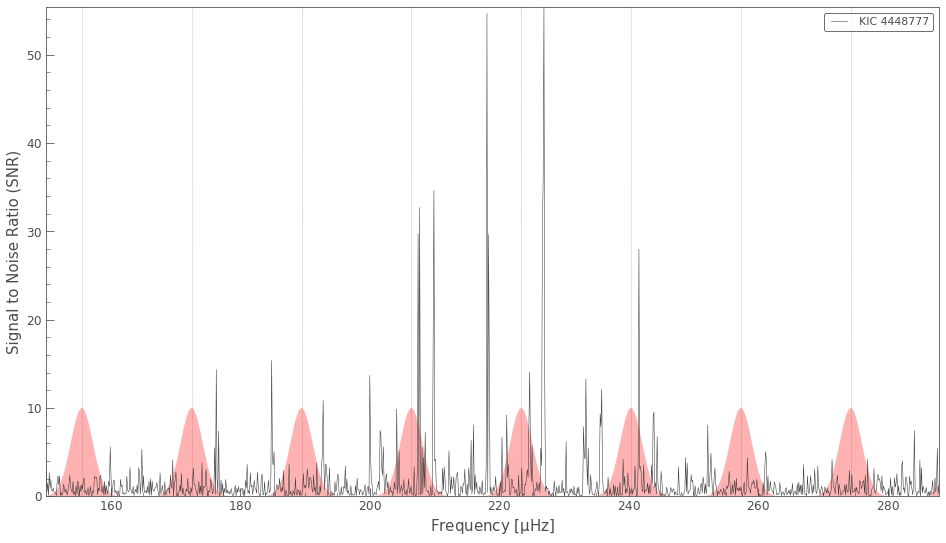

In [7]:
ge_kde = pb.epsilon(method='KDE')
ep_kde = ge_kde(dnu, numax, teff)
print(f'Epsilon from kde : {ep_kde}')
n = np.arange(8, 16, 1)
ge_kde.plot(dnu, numax, teff, p)

In [ ]:
x0 = [numax[0], dnu[0], 0.1, ep_kde[0], 0.03, 30, numax[0]*0.2, -1.0, 2.6]
asy = pb.mcmc(p.frequency.value, p.power.value, x0)
samples = asy(x0)

Burningham


In [ ]:
print(np.mean(samples, axis=0))
print(np.std(samples, axis=0))

In [ ]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
model = asy.model(np.mean(samples, axis=0)[:-1])
ax.plot(asy.f[asy.sel], model, linewidth=2)